In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv("match_0_kill.csv")

In [10]:
df.head(5)

,match_id,player_id,time,kill,assist
0,1,0,0,0,0
1,1,0,1,0,0
2,1,0,2,0,0
3,1,0,3,0,0
4,1,0,4,0,0


In [11]:
for i in range(5):  # Assuming 5 players, indexed from 0 to 4
    gsr_df = pd.read_csv(f'gsr_{i}.csv')
    gsr_df['time'] = gsr_df['time'].astype(str).str.replace('.0', '', regex=False).astype(int)
    gsr_df.rename(columns={'gsr_value': f'gsr_player_{i}'}, inplace=True)
    match_kill_df = pd.merge(df, gsr_df, on='time', how='left')


In [12]:
match_kill_df

,match_id,player_id,time,kill,assist,gsr
0,1,0,0,0,0,25144.281649
1,1,0,1,0,0,25171.864626
2,1,0,2,0,0,25098.474293
3,1,0,3,0,0,25186.461510
4,1,0,4,0,0,25260.695727
...,...,...,...,...,...,...
15315,1,9,1527,0,0,NaN
15316,1,9,1528,0,0,NaN
15317,1,9,1529,0,0,NaN
15318,1,9,1530,0,0,NaN


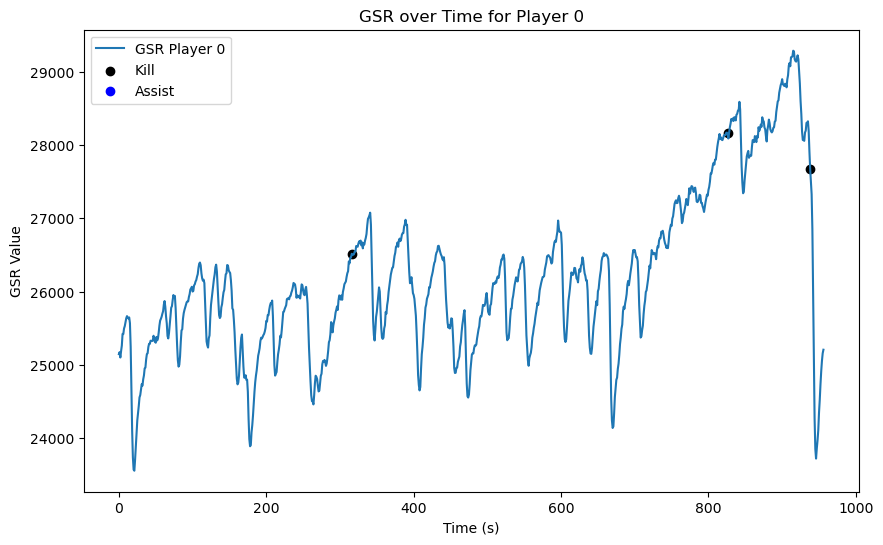

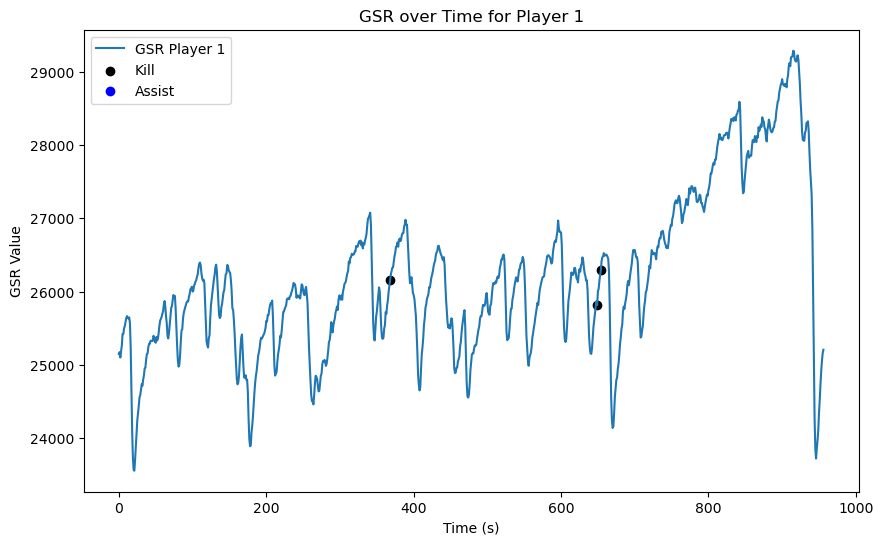

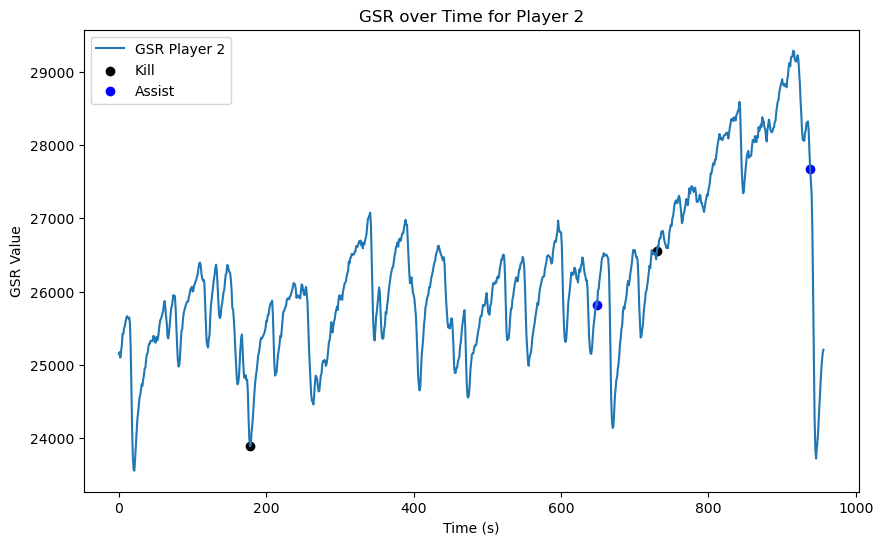

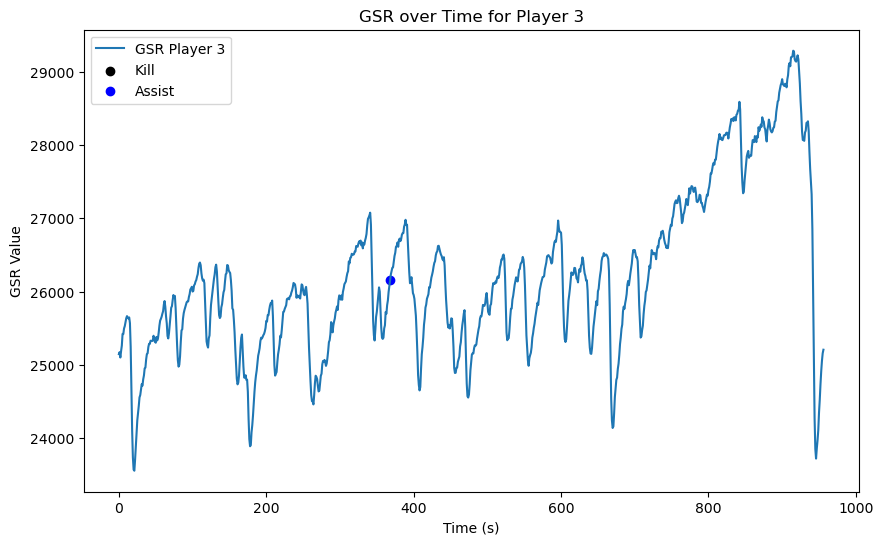

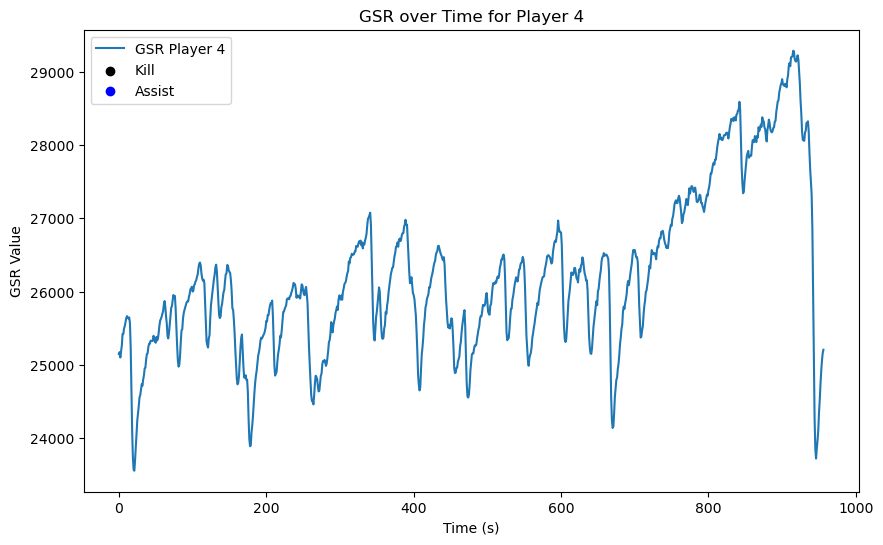

In [15]:
for player_id in range(5):  # Assuming player IDs are from 0 to 4
    # Filter data for the current player
    player_data = match_kill_df[match_kill_df['player_id'] == player_id]
    
    # Plot setup
    plt.figure(figsize=(10, 6))
    plt.plot(player_data['time'], player_data['gsr'], label=f'GSR Player {player_id}')
    
    # Mark kills
    kill_times = player_data[player_data['kill'] == 1]['time']
    kill_gsr = player_data[player_data['kill'] == 1]['gsr']
    plt.scatter(kill_times, kill_gsr, color='black', label='Kill')
    
    # Mark assists
    assist_times = player_data[player_data['assist'] == 1]['time']
    assist_gsr = player_data[player_data['assist'] == 1]['gsr']
    plt.scatter(assist_times, assist_gsr, color='blue', label='Assist')
    
    # Finalizing plot
    plt.title(f'GSR over Time for Player {player_id}')
    plt.xlabel('Time (s)')
    plt.ylabel('GSR Value')
    plt.legend()
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming match_kill_df is already loaded and contains the necessary data
# Loop through each player ID to create a separate plot for each
for player_id in range(5):  # Adjust the range as needed for the number of players
    # Filter data for the current player
    player_data = match_kill_df[match_kill_df['player_id'] == player_id]
    
    # Set up the plot
    plt.figure(figsize=(10, 6))
    plt.plot(player_data['time'], player_data['gsr'], label='GSR')
    
    # Mark kills with black dots
    kills = player_data[player_data['kill'] == 1]
    plt.scatter(kills['time'], kills['gsr'], color='black', label='Kill', zorder=5)
    
    # Mark assists with blue dots
    assists = player_data[player_data['assist'] == 1]
    plt.scatter(assists['time'], assists['gsr'], color='blue', label='Assist', zorder=5)
    
    # Customize the plot
    plt.title(f'GSR over Time for Player {player_id}')
    plt.xlabel('Time (s)')
    plt.ylabel('GSR Value')
    plt.legend()
    plt.grid(True)
    
    # Display the plot
    plt.show()
